step-by-step process for approaching ML problems:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings. 

In [3]:
pip install numpy sweetviz matplotlib plotly seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install kaggle scikit-learn --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Understanding the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders and identify the following:

1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impact will it have on the business?
3. How is this problem solved currently, without any machine learning tools?
4. Who will use the results of this model, and how does it fit into other business processes?
5. How much historical data do we have, and how was it collected?
6. What features does the historical data contain? Does it contain the historical values for what we're trying to predict.
7. What are some known issues with the data (data entry errors, missing data, differences in units etc.)
8. Can we look at some sample rows from the dataset? How representative are they of the entire dataset.
9. Where is the data stored and how will you get access to it?
10. ...


Gather as much information about the problem as possible, so that you're clear understanding of the objective and feasibility of the project.

## Download Data

In [2]:
os.listdir("rossmann-store-sales")

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [3]:
ross_df = pd.read_csv("rossmann-store-sales/train.csv", low_memory = False)

In [4]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
store_df = pd.read_csv("rossmann-store-sales/store.csv")
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
merged_df = ross_df.merge(store_df, how = "left", on = "Store")
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
merged_df.shape

(1017209, 18)

In [8]:
test_df = pd.read_csv("rossmann-store-sales/test.csv")
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [9]:
merged_test_df = test_df.merge(store_df, how = "left", on = "Store")
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Clean Dataset

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [12]:
merged_df.duplicated().sum()

np.int64(0)

In [13]:
merged_df["Date"] = pd.to_datetime(merged_df.Date)

In [14]:
merged_test_df["Date"] = pd.to_datetime(merged_test_df.Date)

In [15]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [16]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

### Exploratory Data Analysis and Visualization

Objectives of exploratory data analysis:

- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering

<Axes: xlabel='Sales', ylabel='Count'>

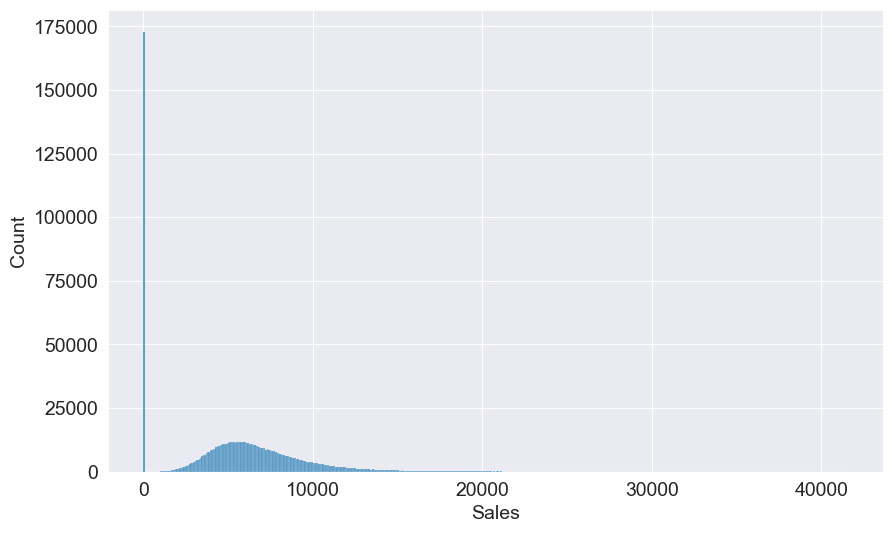

In [17]:
sns.histplot(data = merged_df, x = "Sales")

In [18]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [19]:
merged_df.Sales.value_counts()[0]

np.int64(172871)

In [20]:
merged_df = merged_df[merged_df.Open == 1].copy()

<Axes: xlabel='Sales', ylabel='Count'>

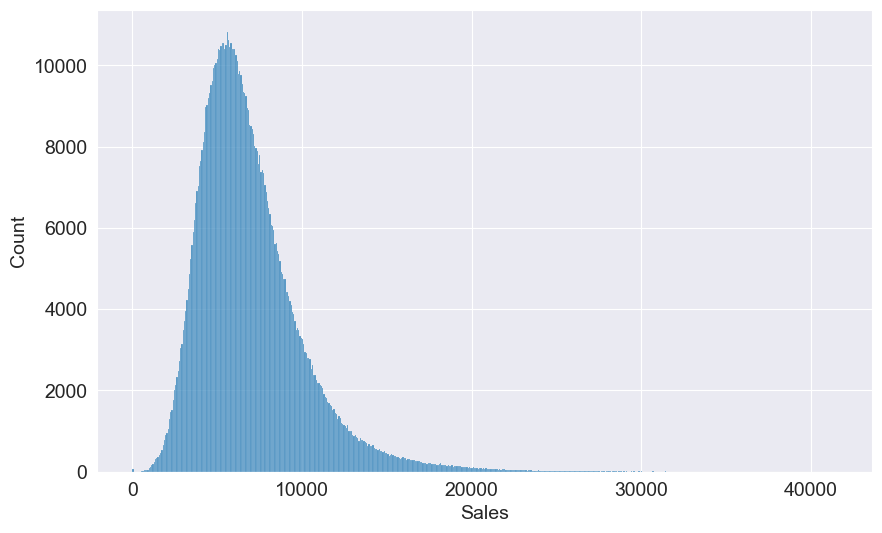

In [21]:
sns.histplot(merged_df, x = "Sales")

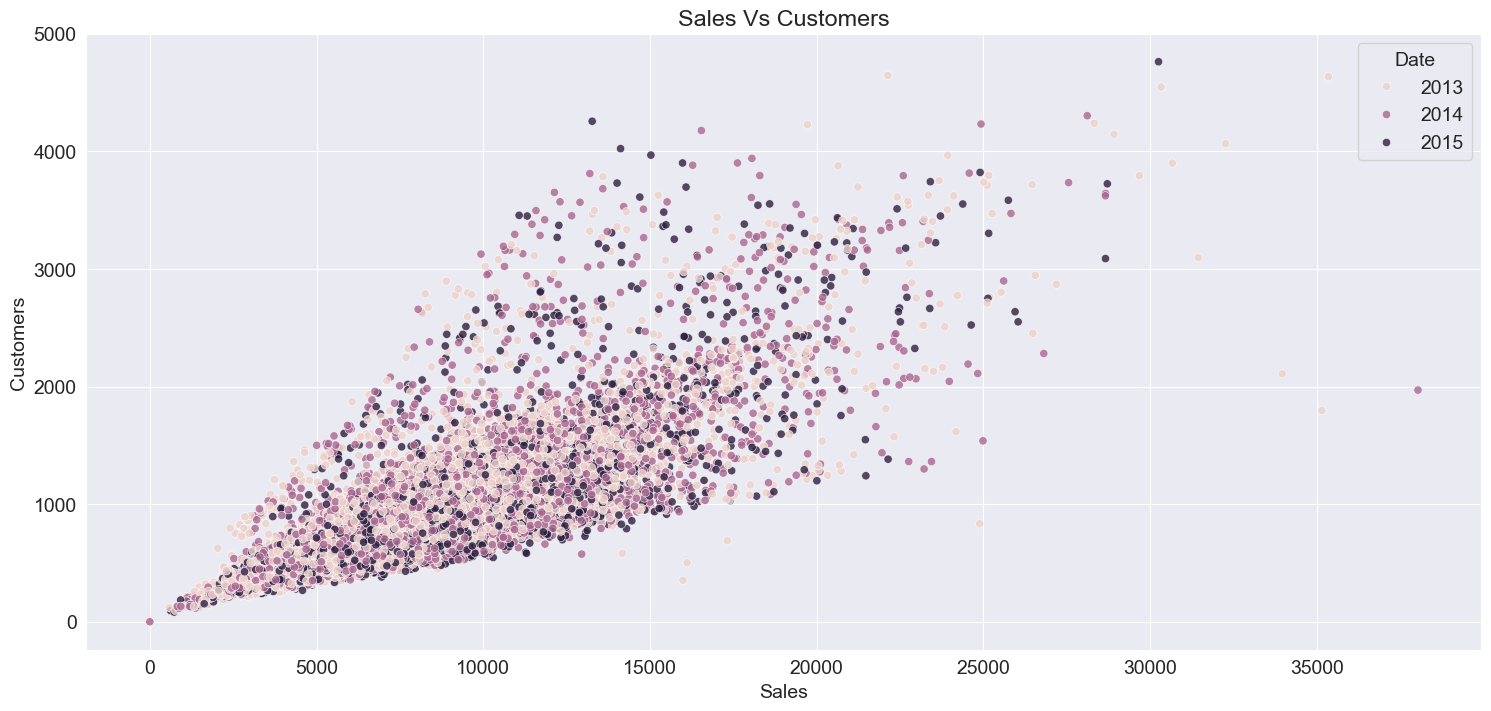

In [22]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x = temp_df.Sales, y = temp_df.Customers, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title("Sales Vs Customers")
plt.show()

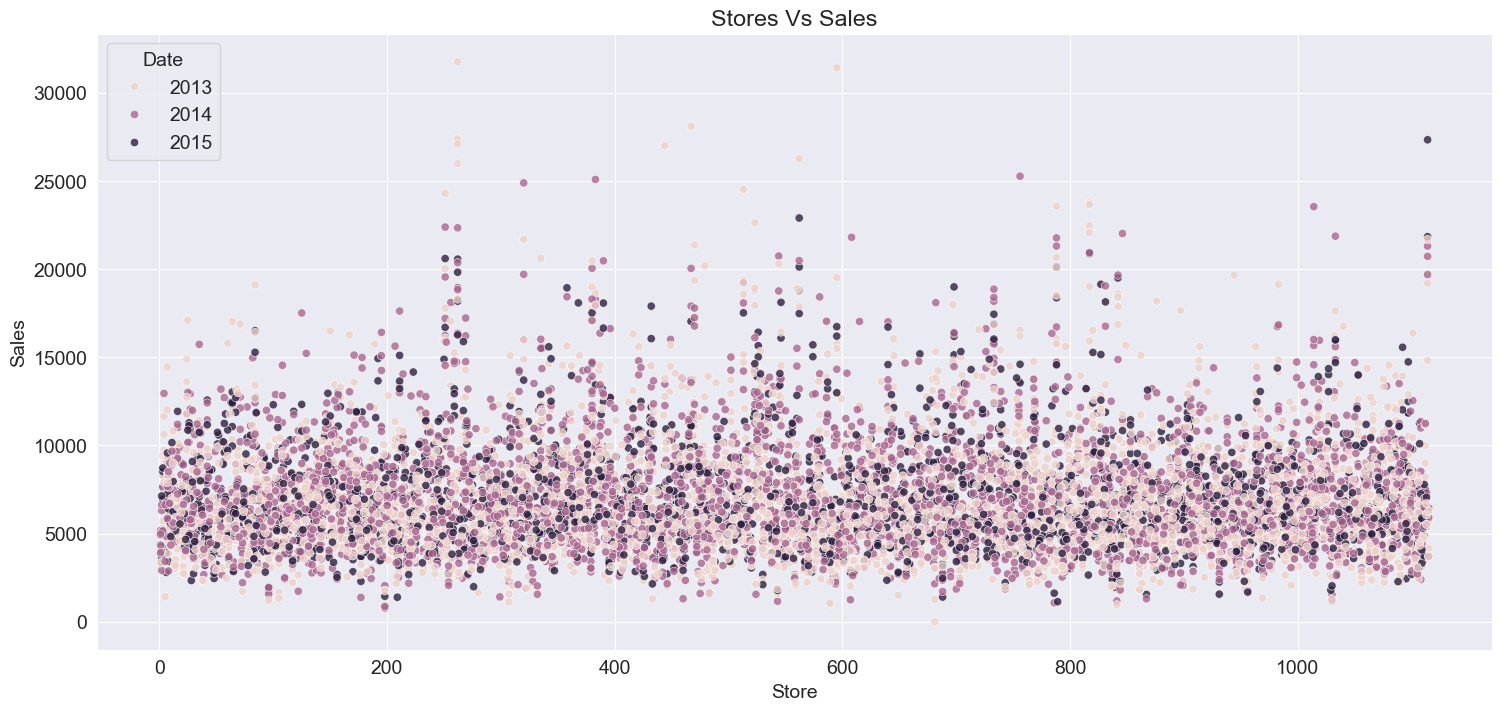

In [23]:
plt.figure(figsize = (18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x = temp_df.Store, y = temp_df.Sales, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title("Stores Vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

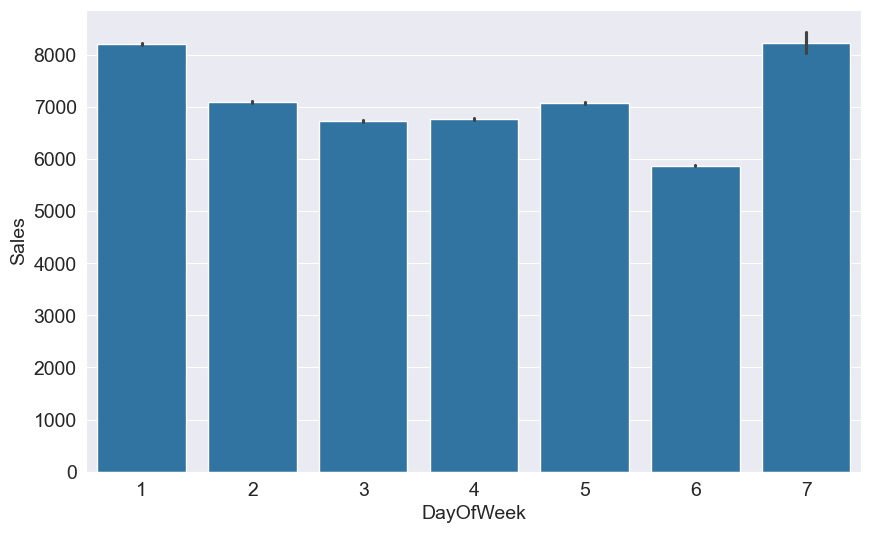

In [24]:
sns.barplot(merged_df, x = 'DayOfWeek', y = 'Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

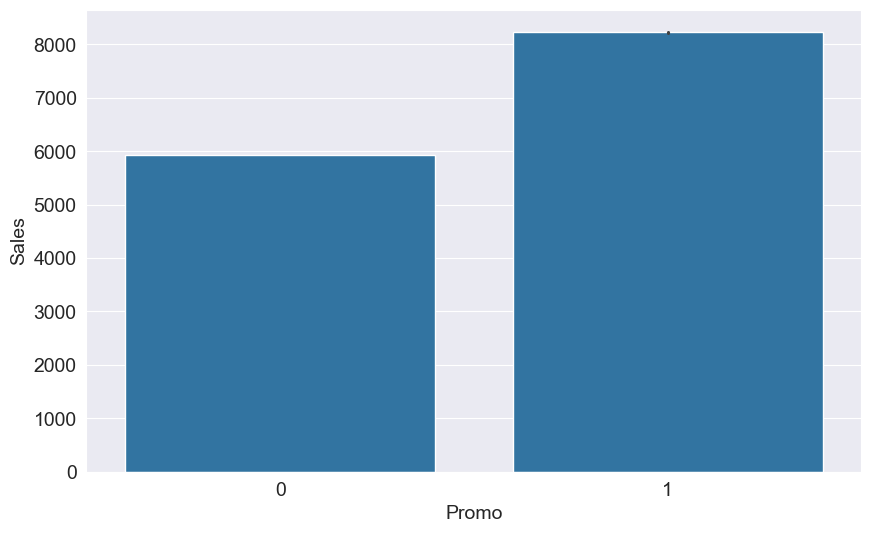

In [25]:
sns.barplot(merged_df, x = 'Promo', y = 'Sales')

### Feature Engineering

Feature engineering is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources. 


For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End

In [26]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [27]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

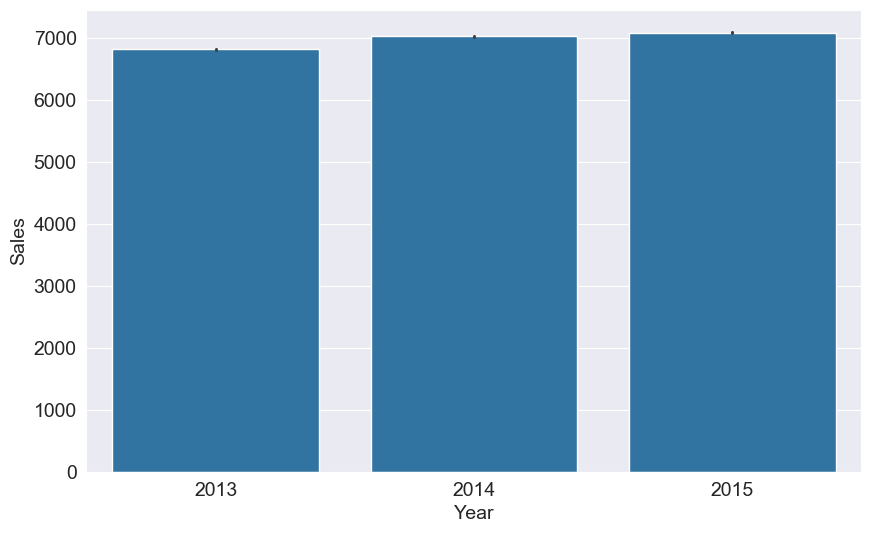

In [28]:
sns.barplot(merged_df, x = "Year", y = "Sales")

<Axes: xlabel='Month', ylabel='Sales'>

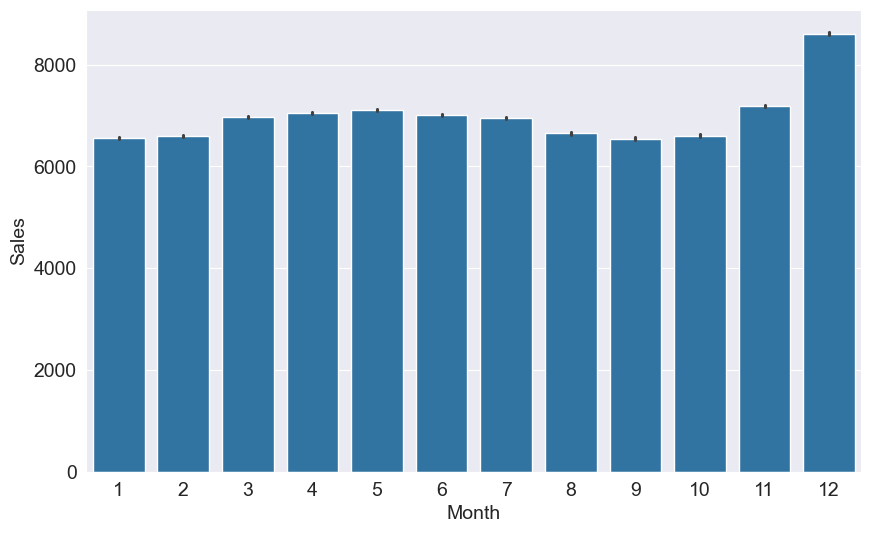

In [29]:
sns.barplot(merged_df, x = "Month", y = "Sales")

## Step 4 - Create a training/test/validation split and prepare the data for training

### Train/Test/Validation Split

The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll the last 25% of rows for the validation set, after ordering by date

In [30]:
len(merged_df)

844392

In [31]:
train_size = int(.75 * len(merged_df))
train_size

633294

In [32]:
sorted_df = merged_df.sort_values("Date")
train_df, validation_df = sorted_df[:train_size], sorted_df[train_size:]

In [33]:
len(train_df), len(validation_df)

(633294, 211098)

In [34]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [35]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [36]:
input_columns = ["Store", "DayOfWeek", "Promo", "StateHoliday",
              "StoreType", "Assortment", "Day", "Month", "Year"]

In [37]:
target_column = "Sales"

In [38]:
merged_df[input_columns].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [39]:
train_inputs = train_df[input_columns].copy()
train_targets = train_df[target_column].copy()

In [40]:
validation_inputs = validation_df[input_columns].copy()
validation_targets = validation_df[target_column].copy()

In [41]:
test_inputs = merged_test_df[input_columns].copy()
# Test data does not have targets

In [42]:
numeric_columns = ["Store", "Day", "Month", "Year"]
categorical_columns = ["DayOfWeek", "Promo", "StateHoliday", "StoreType", "Assortment"]

### Imputation, Scaling and Encode

Let's impute missing data from numeric columns and scale the values to the $(0, 1)$ range. 

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
imputer = SimpleImputer(strategy = "mean").fit(train_inputs[numeric_columns])

In [45]:
train_inputs[numeric_columns] = imputer.transform(train_inputs[numeric_columns])
validation_inputs[numeric_columns] = imputer.transform(validation_inputs[numeric_columns])
test_inputs[numeric_columns] = imputer.transform(test_inputs[numeric_columns])

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler().fit(train_inputs[numeric_columns])

In [48]:
train_inputs[numeric_columns] = scaler.transform(train_inputs[numeric_columns])
validation_inputs[numeric_columns] = scaler.transform(validation_inputs[numeric_columns])
test_inputs[numeric_columns] = scaler.transform(test_inputs[numeric_columns])

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore").fit(train_inputs[categorical_columns])
encoded_columns = list(encoder.get_feature_names_out(categorical_columns))

In [51]:
train_inputs[encoded_columns] = encoder.transform(train_inputs[categorical_columns])
validation_inputs[encoded_columns] = encoder.transform(validation_inputs[categorical_columns])
test_inputs[encoded_columns] = encoder.transform(test_inputs[categorical_columns])

In [52]:
x_train = train_inputs[numeric_columns + encoded_columns]
x_validation = validation_inputs[numeric_columns + encoded_columns]
x_test = test_inputs[numeric_columns + encoded_columns]

## Step 5 - Create quick & easy baseline models to benchmark future models

A quick baseline model helps establish the minimum score any ML model you train should achieve.


### Fixed/Random Guess

Let's define a model that always returns the mean value of Sales as the prediction.

In [53]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [54]:
train_predictions = return_mean(x_train)

In [55]:
train_predictions

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076], shape=(633294,))

In [56]:
from sklearn.metrics import mean_squared_error

In [66]:
pip install --upgrade scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [57]:
import sklearn
print(sklearn.__version__)

1.7.1


In [58]:
np.sqrt(mean_squared_error(train_predictions, train_targets))

np.float64(3082.450443277419)

In [59]:
np.sqrt(mean_squared_error(return_mean(x_validation), validation_targets))

np.float64(3168.6033635047716)

In [60]:
def guess_random(inputs):
    low, high = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs)) * (high - low) + low

In [61]:
train_predictions = guess_random(x_train)
train_predictions

array([15703.83306294,   775.06187808, 17545.43196614, ...,
       35673.13035578, 13312.5677032 , 24008.24386248], shape=(633294,))

In [62]:
np.sqrt(mean_squared_error(train_predictions, train_targets))

np.float64(18620.145295082388)

In [63]:
np.sqrt(mean_squared_error(guess_random(x_validation), validation_targets))

np.float64(18409.77623141031)

### Baseline ML model

Let's train a simple `LinearRegression` model, with no customization.

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
linreg = LinearRegression()

In [66]:
linreg.fit(x_train, train_targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
train_predictions = linreg.predict(x_train)
train_predictions

array([ 7115.08762455, 10581.38651873,  7036.39236244, ...,
        6241.95353708,  5997.17125059,  5618.95124099], shape=(633294,))

In [68]:
np.sqrt(mean_squared_error(train_predictions, train_targets))

np.float64(2741.5871919165775)

In [69]:
validation_predictions = linreg.predict(x_validation)
validation_predictions

array([5619.13905784, 5619.23296627, 5997.82860958, ..., 8646.58181098,
       8401.32998235, 7843.07278986], shape=(211098,))

In [70]:
np.sqrt(mean_squared_error(validation_predictions, validation_targets))

np.float64(2817.7797940117125)

## Step 6 - Pick a strategy, train a model & tune hyperparameters

In [71]:
model = LinearRegression()

In [72]:
def try_model(model):
    model.fit(x_train, train_targets)
    
    # Generate predictions
    train_predictions = model.predict(x_train)
    validation_predictions = model.predict(x_validation)
    
    # Compute RMSE
    train_rmse = np.sqrt(mean_squared_error(train_predictions, train_targets))
    validation_rmse = np.sqrt(mean_squared_error(validation_predictions, validation_targets))
    return train_rmse, validation_rmse

### Linear Models

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [74]:
try_model(LinearRegression())

(np.float64(2741.5871919165775), np.float64(2817.7797940117125))

In [75]:
try_model(Ridge())

(np.float64(2741.587195081445), np.float64(2817.7784665409863))

In [76]:
try_model(Lasso())

(np.float64(2741.7143904640566), np.float64(2817.9472924045217))

In [77]:
try_model(ElasticNet())

(np.float64(2879.0432103903954), np.float64(2972.6658860503385))

### Tree Based Models

In [78]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [79]:
tree = DecisionTreeRegressor(random_state = 42)
try_model(tree)

(np.float64(0.0), np.float64(1559.7378600480247))

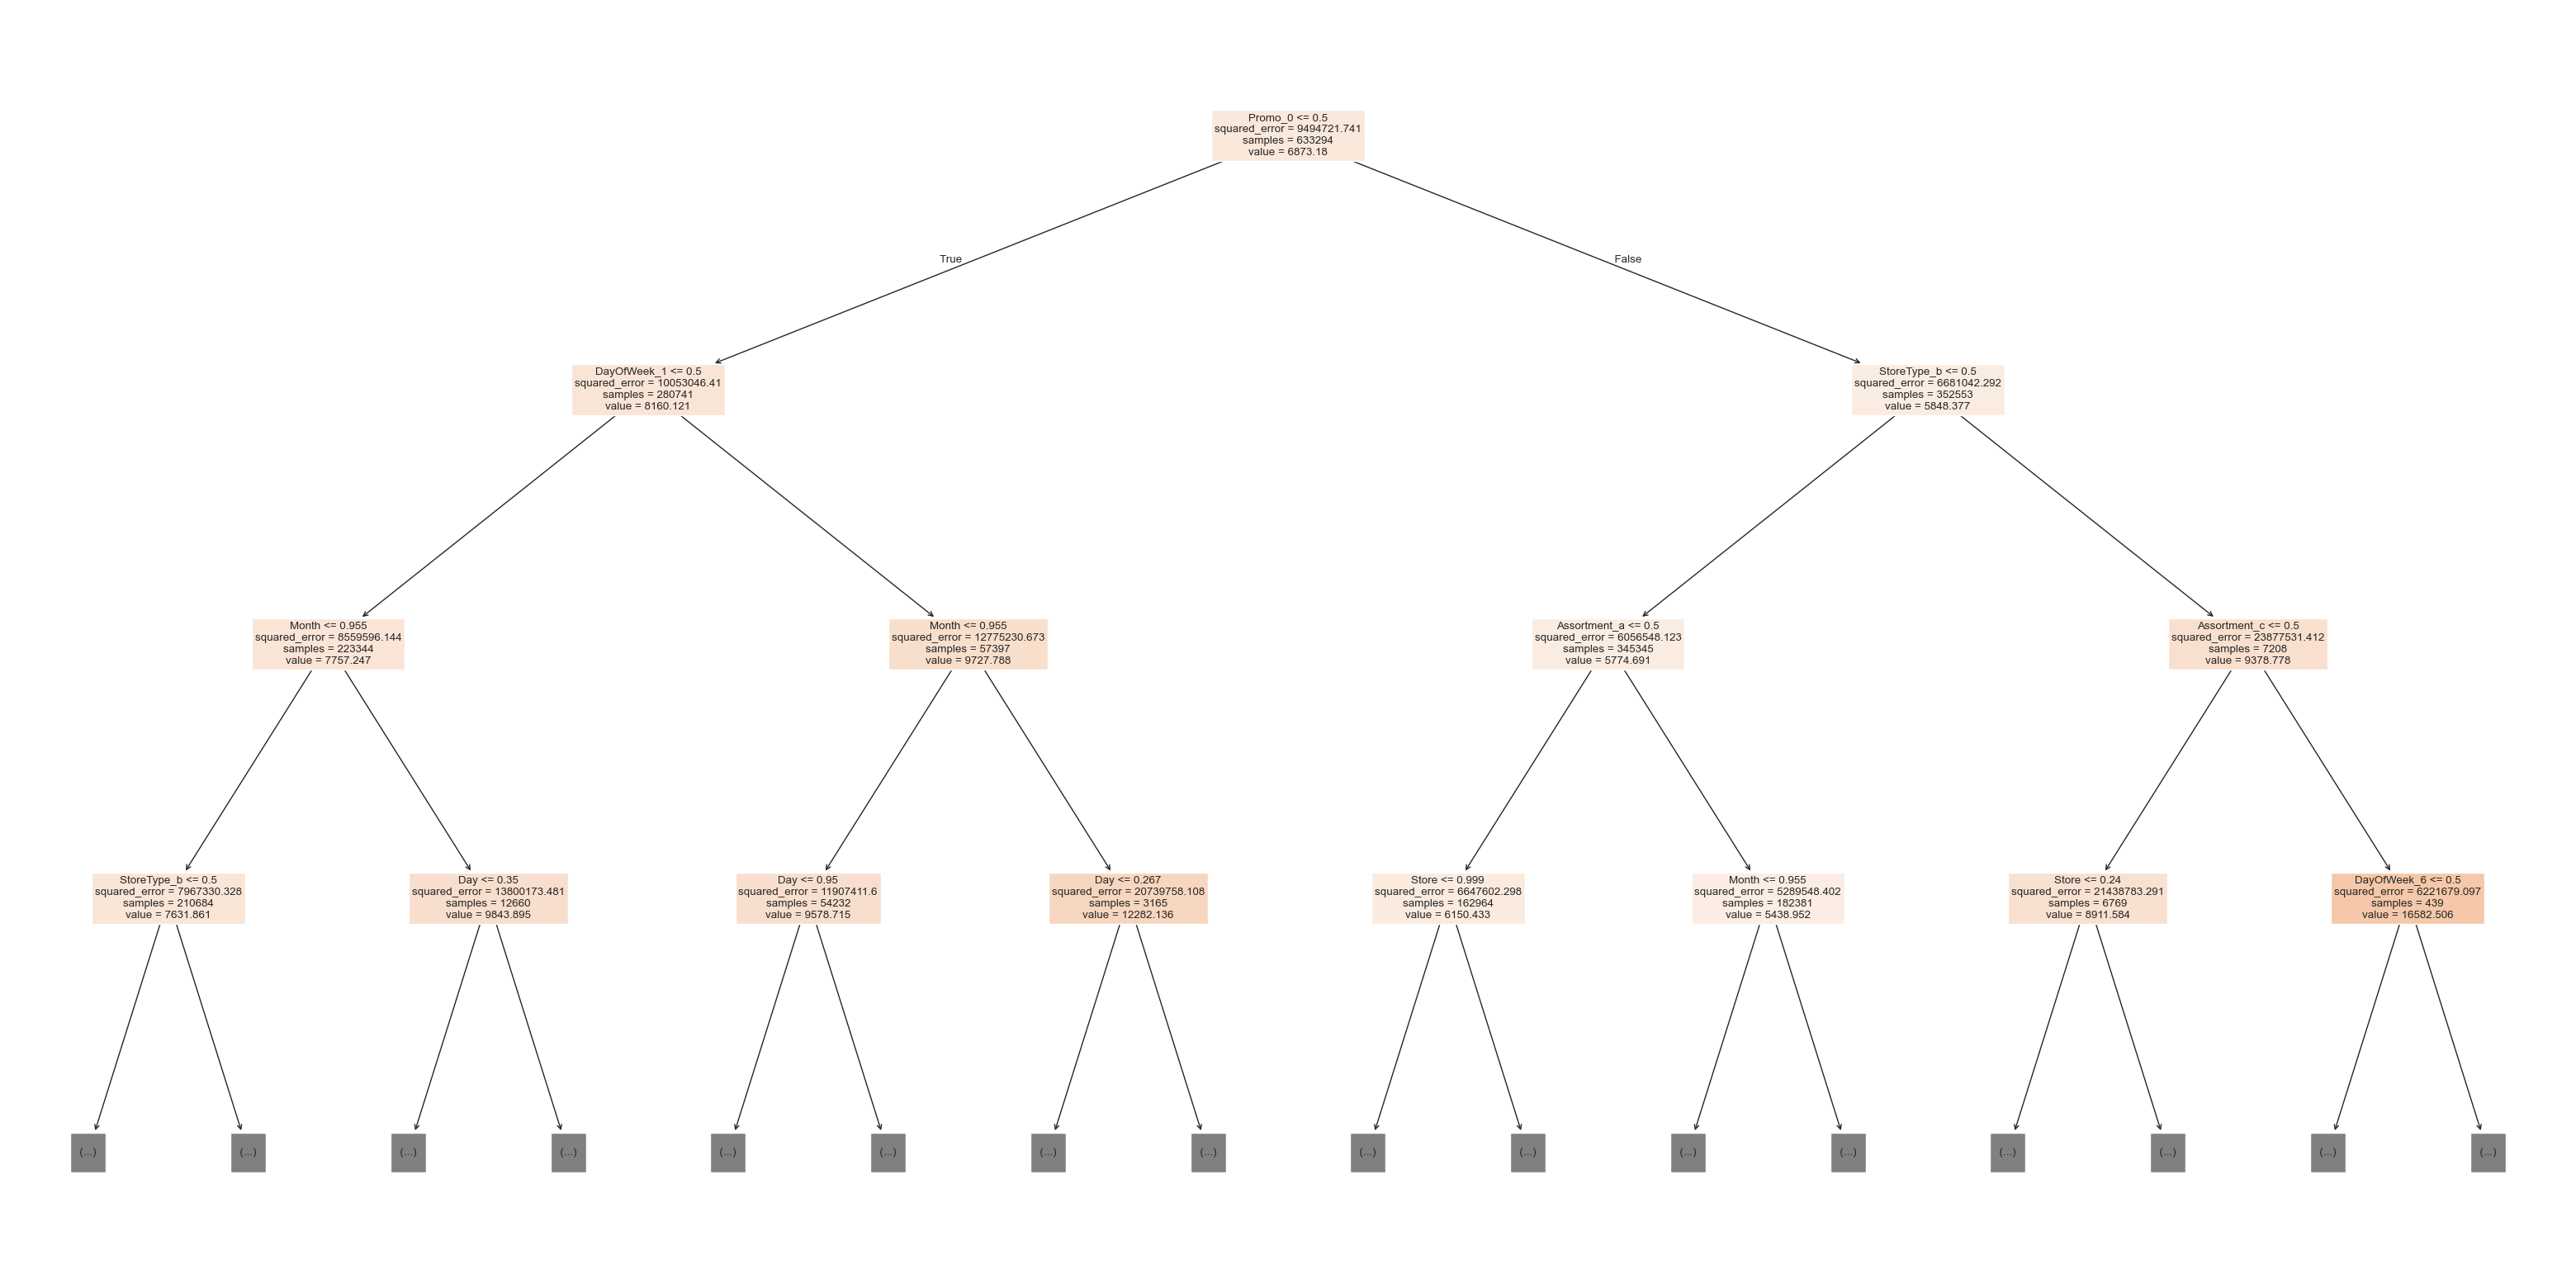

In [80]:
plt.figure(figsize = (40, 20))
plot_tree(tree, max_depth = 3, filled = True, feature_names = numeric_columns + encoded_columns);

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
%%time
rf = RandomForestRegressor(random_state = 42, n_jobs = -1)
try_model(rf)

CPU times: total: 7min 9s
Wall time: 43.6 s


(np.float64(474.9198974666898), np.float64(1371.7321923469985))

## Step 7 - Experiment and combine results from multiple strategies

In general, the following strategies can be used to improve the performance of a model:

- Gather more data. A greater amount of data can let you learn more relationships and generalize the model better.
- Include more features. The more relevant the features for predicting the target, the better the model gets.
- Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and gather some insights
- Try strategies like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (ensembling), or train another model using their results.

### Hyperparameter Optimization & Grid Search

You can tune hyperparameters manually, our use an automated tuning strategy like random search or Grid search. Follow this tutorial for hyperparameter tuning using Grid search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

### K-Fold Cross Validation


Here's what K-fold cross validation looks like visually ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

Follow this tutorial to apply K-fold cross validation: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

## Step 8 - Interpret models, study individual predictions & present your findings

In [83]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [84]:
importance_df = pd.DataFrame({ 
    "feature": numeric_columns + encoded_columns, 
    "importance": rf.feature_importances_
}).sort_values("importance", ascending = False)
importance_df.head(10)

,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


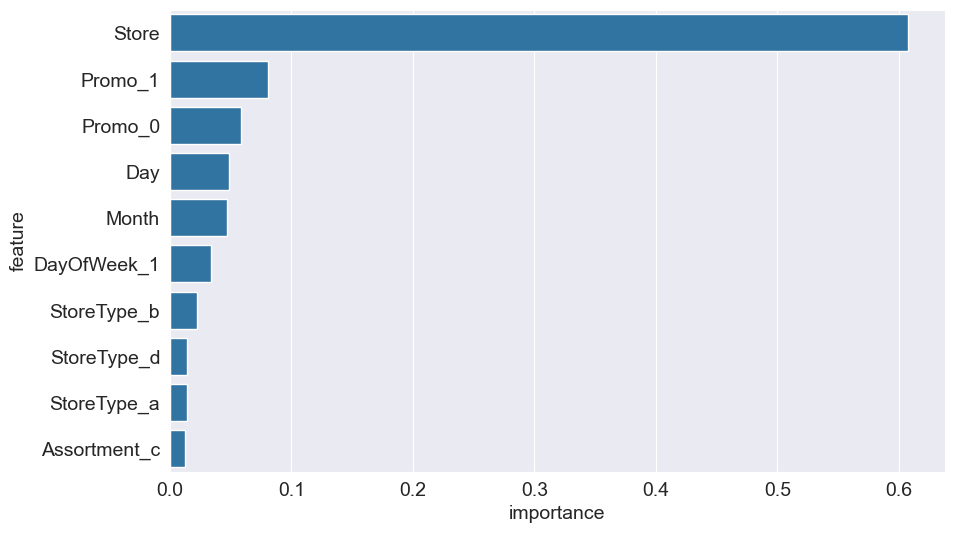

In [85]:
sns.barplot(data=  importance_df.head(10), x = "importance", y = "feature");

### Looking at Individual Predictions

In [87]:
def predict_input(model, single_input):
    if single_input["Open"] == 0:
        return 0.
    input_df = pd.DataFrame([single_input])
    input_df["Date"] = pd.to_datetime(input_df.Date)
    input_df["Day"] = input_df.Date.dt.day
    input_df["Month"] = input_df.Date.dt.month
    input_df["Year"] = input_df.Date.dt.year
    input_df[numeric_columns] = imputer.transform(input_df[numeric_columns])
    input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])
    input_df[encoded_columns] = encoder.transform(input_df[categorical_columns])
    x_input = input_df[numeric_columns + encoded_columns]
    prediction = model.predict(x_input)[0]
    return prediction

In [88]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [89]:
predict_input(rf, sample_input)

np.float64(4258.01)

### Presenting your results

* Create a presentation for non-technical stakeholders
* Understand your audience - figure out what they care about most
* Avoid showing any code or technical jargon, include visualizations
* Focus on metrics that are relevant for the business
* Talk about feature importance and how to interpret results
* Explain the strengths and limitations of the model
* Explain how the model can be improved over time

### Making a submission on Kaggle

If you're participating in a Kaggle competition, you can generate a submission CSV file and make a submission to check your score on the test set.

In [90]:
test_predictions = rf.predict(x_test)
test_predictions

array([ 4258.01,  7713.83,  8775.7 , ...,  5954.68, 20823.07,  6748.48],
      shape=(41088,))

In [91]:
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [93]:
submission_df["Sales"] = test_predictions * test_df["Open"].astype("float")

In [94]:
submission_df.fillna(0, inplace = True)

In [95]:
submission_df.to_csv("submission.csv", index = None)

In [99]:
df = pd.read_csv("submission.csv")
print(df.head()) 

   Id    Sales
0   1  4258.01
1   2  7713.83
2   3  8775.70
3   4  6775.37
4   5  6492.47


In [100]:
from IPython.display import FileLink

In [101]:
FileLink('submission.csv')

C:\Users\JFADIPE\Downloads\John Fadipe - Software Engineering\Machine_Learning_with_Python_and_Scikit_Learn\How to Approach Machine Learning Projects\submission.csv